# Loan Approval Prediction

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/LoanApprovalPrediction.csv"

df = pd.read_csv(path)

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
obj = df.select_dtypes(include=["object"])

In [36]:
obj.shape

(598, 7)

In [37]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

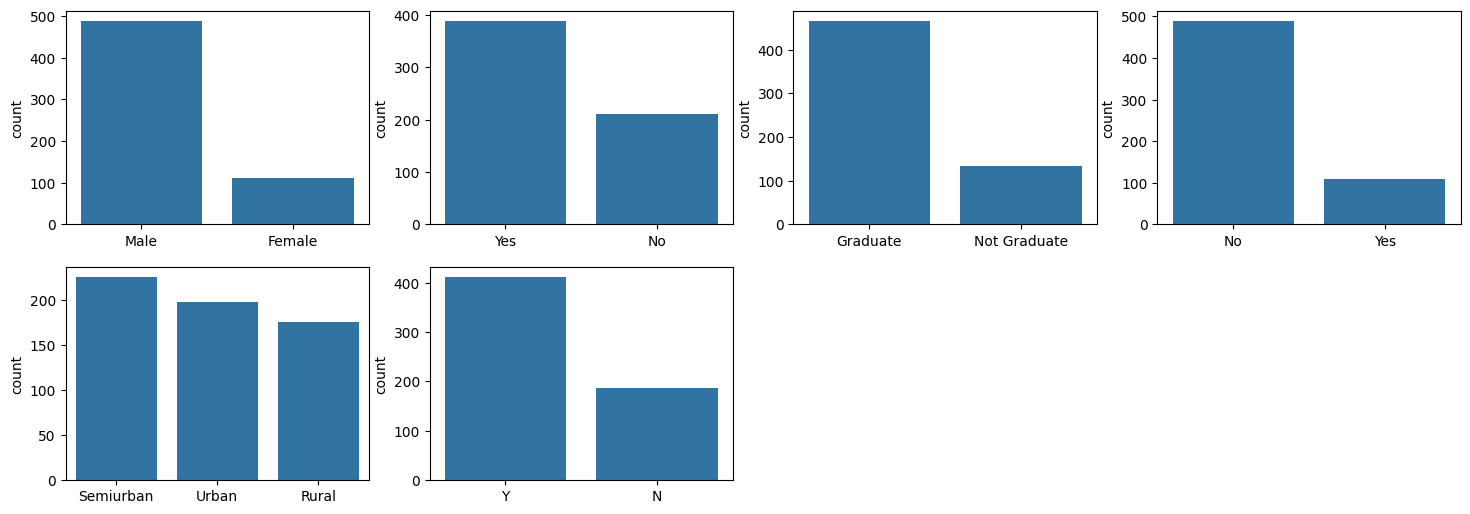

In [41]:
obj_col = df.select_dtypes(include=["object"]).columns

plt.figure(figsize=(18,36))

index = 1

for col in obj_col:
  y = df[col].value_counts()

  plt.subplot(11,4, index)

  sns.barplot(x=list(y.index), y=y)

  index+=1


In [48]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in obj_col:

  le = LabelEncoder()

  df[col] = le.fit_transform(df[col])

  encoders[col] = le


In [52]:
for key, value in encoders.items():
  print(key, value.classes_)

Gender ['Female' 'Male']
Married ['No' 'Yes']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Rural' 'Semiurban' 'Urban']
Loan_Status ['N' 'Y']


In [44]:
df.shape

(598, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


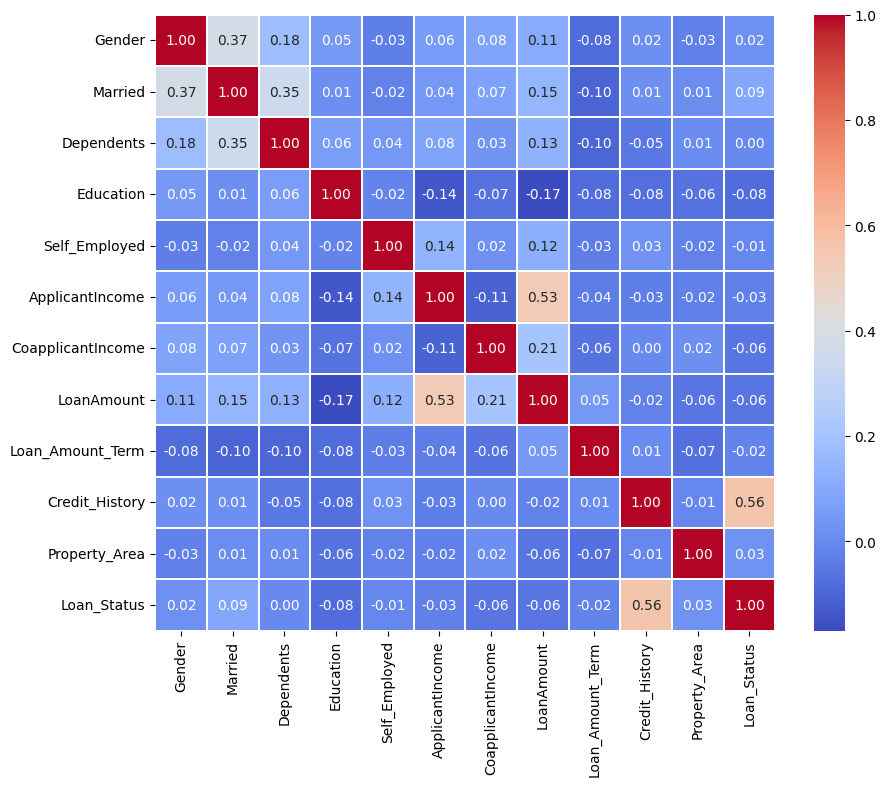

In [53]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), cmap="coolwarm", fmt=".2f", linewidth=1.25, annot=True)

plt.show()

In [54]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Figure size 500x300 with 0 Axes>

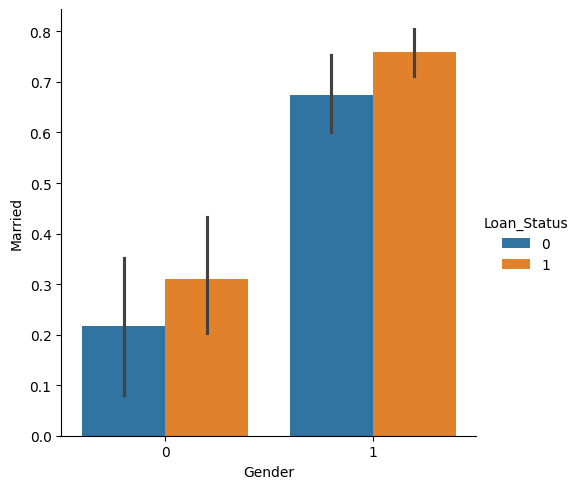

In [58]:
plt.figure(figsize=(5,3))

sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=df)

plt.show()

In [65]:
col_with_null_values = df.columns[df.isnull().any()].tolist()

In [66]:
for col in col_with_null_values:
  df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [67]:
from sklearn.model_selection import train_test_split


X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=13)


In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((448, 11), (150, 11), (448,), (150,))

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 3)

rfc = RandomForestClassifier(n_estimators =10, criterion="entropy", random_state=13)

svc = SVC()

lgr = LogisticRegression()

pipelines = {
    'KNeighborsClassifier': Pipeline([('model', knn)]),
    'RandomForestClassifier': Pipeline([('model', rfc)]),
    'SVC': Pipeline([('model', svc)]),
    'LogisticRegression': Pipeline([('model', lgr)]),
}

results = {}

for name, pipe in pipelines.items():
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  results[name] = acc

print(results)

{'KNeighborsClassifier': 0.6, 'RandomForestClassifier': 0.7533333333333333, 'SVC': 0.6666666666666666, 'LogisticRegression': 0.7533333333333333}


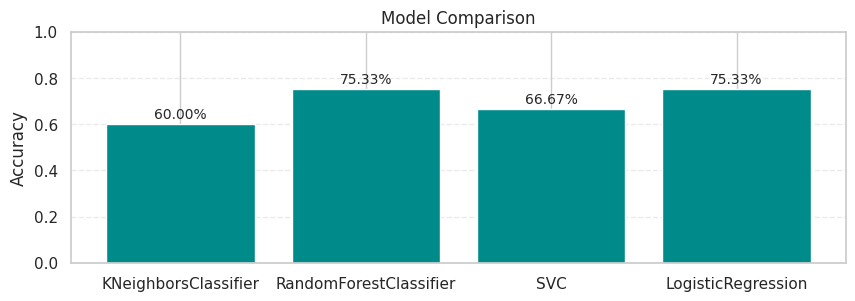

In [109]:
models = results.keys()
accuracy = results.values()

plt.figure(figsize=(10, 3))

bars = plt.bar(models, accuracy, color='darkcyan')

for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.01,
             f"{acc:.2%}",
             ha='center', va='bottom', fontsize=10)

plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()